In [68]:
import numpy as np
import ceo
from ceo.pyramid import Pyramid as Pym
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
N_SIDE_LENSLET=40
n = N_SIDE_LENSLET*32
gmt = ceo.GMT_MX()

In [70]:
src = ceo.Source('V',zenith=0,azimuth=0,
                rays_box_size=25.5,
                rays_box_sampling=n,
                rays_origin=[0,0,25])
src>>(gmt,)
+src
src.wavefront.rms(-9)

array([0.76298479])

In [71]:
pym = Pym(N_SIDE_LENSLET,n,modulation=0.0,separation=2)
src>>(gmt,pym)

(@CEO)>Pyramid: Set modulation sampling to 0


In [72]:
+src
pym_flux0 = pym.camera.frame.host().sum()

In [75]:
pym_flux0

3122634400000.0

In [98]:
hpd = np.arange(0,21,0.5)

In [99]:
pym_flux = []
pym.modulation = 0
for h in hpd:
    pym.camera.reset()
    pym.high_pass_diam = h
    +src
    pym_flux += [pym.camera.frame.host().sum()]

In [100]:
pym.high_pass_diam = 0
pym.modulation = 1
pym.camera.reset()
+src
pym_mod_flux0 = pym.camera.frame.host().sum()

pym_mod_flux0/pym_flux0

1.0000001

In [101]:
pym_mod1_flux = []
for h in hpd:
    pym.camera.reset()
    pym.high_pass_diam = h
    +src
    pym_mod1_flux += [pym.camera.frame.host().sum()]

In [102]:
pym.high_pass_diam = 0
pym.modulation = 2
pym.camera.reset()
+src
pym_mod_flux0 = pym.camera.frame.host().sum()

pym_mod_flux0/pym_flux0

1.0

In [ ]:
pym_mod2_flux = []
for h in hpd:
    pym.camera.reset()
    pym.high_pass_diam = h
    +src
    pym_mod2_flux += [pym.camera.frame.host().sum()]

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(hpd,pym_flux/pym_flux0,'o-',label = 'no modulation')
ax.plot(hpd,pym_mod1_flux/pym_flux0,'o-', label = 'modulation 1')
ax.plot(hpd,pym_mod2_flux/pym_flux0,'o-', label = 'modulation 2')
ax.set_xticks(hpd)
ax.grid()
ax.set_xlabel("High pass filter diameter [lambda/D]")
ax.set_ylabel("Normalized intensiy")
ax.legend()

In [22]:
pym_flux

191246930000.0

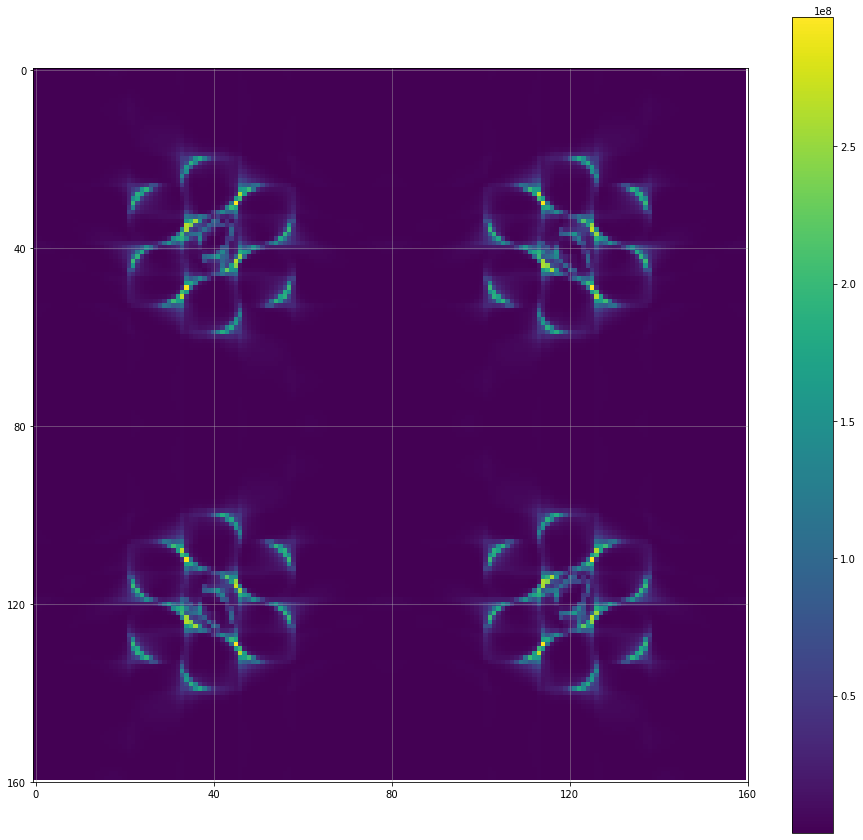

In [7]:
fig = plt.figure()
fig.set_size_inches(16,15)
plt.imshow(pym.camera.frame.host())
plt.colorbar()
u = np.arange(0,pym.camera.frame.host().shape[0]*5/4,pym.camera.frame.host().shape[0]/4)
plt.xticks(u)
plt.yticks(u)
plt.grid(alpha=0.5)

In [9]:
n

1280

In [47]:
imgr = ceo.Imaging(N_PX_PUPIL=n-1)

In [48]:
src>>(gmt,imgr)

In [49]:
+src

In [50]:
frame = imgr.frame.host()
imgr_flux0 = imgr.frame.host().sum()

In [53]:
imgr_flux0

3115623600000.0

In [54]:
lod = src.wavelength/src.rays.L

In [55]:
imgr.pixelScale(src)/lod

0.5000000137263928

In [56]:
u = 0.5*(np.arange(imgr.N_PX_FRAME) - (imgr.N_PX_FRAME-1)/2)
[x,y] = np.meshgrid(u,u)
r = np.hypot(x,y)

In [60]:
imgr_flux = []
for h in hpd:
    imgr_flux += [(frame*(r>0.5*h)).sum()]

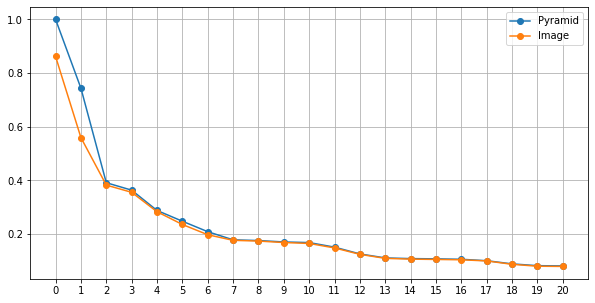

In [63]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(hpd,pym_flux/pym_flux0,'o-',label='Pyramid')
ax.plot(hpd,imgr_flux/imgr_flux0,'o-',label="Image")
ax.set_xticks(hpd)
ax.grid()
ax.legend()

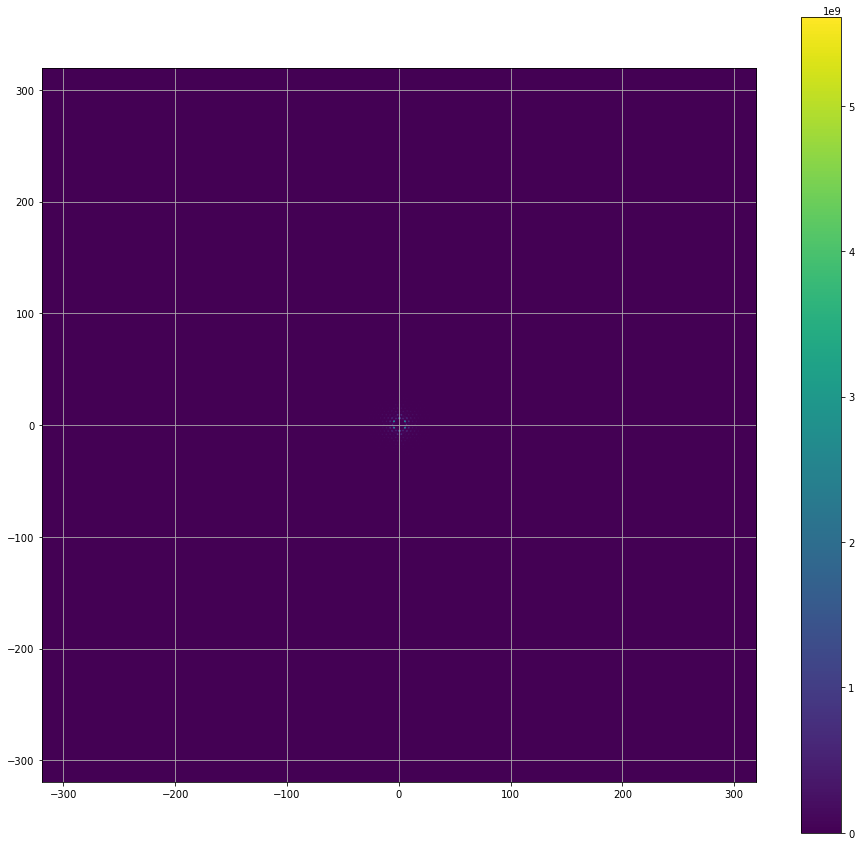

In [26]:
fig = plt.figure()
fig.set_size_inches(16,15)
plt.imshow(imgr.frame.host()*(r>5),extent=[u[0],u[-1],u[0],u[-1]])
plt.colorbar()
plt.grid()